import function ที่เราจำเป็นต้องเอามาใช้หลักๆ
- โปรเจคนี้เราสนใจถึง ประชากรรถ ev ใน รัฐ washington
- การเติบโตของรถ ev
- 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import shapiro,levene,mannwhitneyu

In [3]:
df = pd.read_csv("archive\Electric_Vehicle_Population_Data.csv")
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         150482 non-null  object 
 1   County                                             150479 non-null  object 
 2   City                                               150479 non-null  object 
 3   State                                              150482 non-null  object 
 4   Postal Code                                        150479 non-null  float64
 5   Model Year                                         150482 non-null  int64  
 6   Make                                               150482 non-null  object 
 7   Model                                              150482 non-null  object 
 8   Electric Vehicle Type                              150482 non-null  object

In [5]:
df.shape

(150482, 17)

In [6]:
df.isna().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 341
DOL Vehicle ID                                         0
Vehicle Location                                       7
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

ปรับให้พร้อมสำหรับการ transforms

In [7]:
df.columns = df.columns.str.replace(" ", "_").str.lower()
## หรือ แบบนี้
# col_names = df.columns
# rename_cols =  [col_name.lower().replace(" ","_") for col_name in col_names]
# df.columns = rename_cols

In [8]:
df.postal_code = df.postal_code.astype(str)

In [9]:
df

,vin_(1-10),county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_(cafv)_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,2020_census_tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150477,WBY43AW05P,Grays Harbor,Montesano,WA,98563.0,2023,BMW,I4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,19.0,251204075,POINT (-123.60535 46.982215),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...,5.302700e+10
150478,5YJ3E1EB7P,King,Seattle,WA,98104.0,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,43.0,241344414,POINT (-122.329075 47.6018),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
150479,5YJYGDEEXM,King,Seattle,WA,98109.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,43.0,180705626,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
150480,5UXTA6C08P,Snohomish,Mountlake Terrace,WA,98043.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,1.0,240473950,POINT (-122.30842 47.78416),PUGET SOUND ENERGY INC,5.306105e+10


จัดการค่า null ต่างๆให้เรียบร้อย

In [10]:
df[df.county.isna()]
#หรือ df[df['county'].isna()]

,vin_(1-10),county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_(cafv)_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,2020_census_tract
133103,5YJRE11B48,NaN,NaN,BC,nan,2008,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,98950,NaN,143609049,NaN,NaN,NaN
136622,5YJ3E1EA5K,NaN,NaN,BC,nan,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,475254825,NaN,NaN,NaN
140136,1N4AZ0CP1D,NaN,NaN,AP,nan,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,NaN,112277063,NaN,NaN,NaN


county , city , postal_code, Vehicle Location , Electric Utility   ใส่เป็น mode ตามแบบ stat (เป็น str)
Legislative District , 2020 Census Tract  ใส่เป็น mean ตามแบบ stat จะไม่ส่งผลต่อการคำนวณ

In [11]:
# fix object(string) na with mode (stat) 
df.county.fillna(value = df.county.mode()[0],inplace= True)
df.city.fillna(value = df.city.mode()[0],inplace= True)
df.postal_code.fillna(value = df.postal_code.mode()[0],inplace= True)
df.vehicle_location.fillna(value = df.vehicle_location.mode()[0],inplace= True)
df.electric_utility.fillna(value = df.electric_utility.mode()[0],inplace= True)


In [12]:
# fix numeric(int + float) with mean (stat)
df.legislative_district.fillna(value = df['legislative_district'].mean(), inplace=True)
df['2020_census_tract'].fillna(value = df['2020_census_tract'].mean() , inplace= True)

เช็ค ว่ายังเหลือ na ไหม

In [13]:
df.isna().sum()

vin_(1-10)                                           0
county                                               0
city                                                 0
state                                                0
postal_code                                          0
model_year                                           0
make                                                 0
model                                                0
electric_vehicle_type                                0
clean_alternative_fuel_vehicle_(cafv)_eligibility    0
electric_range                                       0
base_msrp                                            0
legislative_district                                 0
dol_vehicle_id                                       0
vehicle_location                                     0
electric_utility                                     0
2020_census_tract                                    0
dtype: int64

# เริ่มการ visualize

# 1. find most 10 company ev car was sold

In [14]:
top_10_car = df.make.value_counts().head(10).reset_index()
top_10_car

,index,make
0,TESLA,68983
1,NISSAN,13497
2,CHEVROLET,12026
3,FORD,7614
4,BMW,6439
5,KIA,6198
6,TOYOTA,5223
7,VOLKSWAGEN,4074
8,VOLVO,3536
9,JEEP,3292


In [15]:
top_10_car.make[1]/top_10_car.make.sum()*100

10.31234241530539

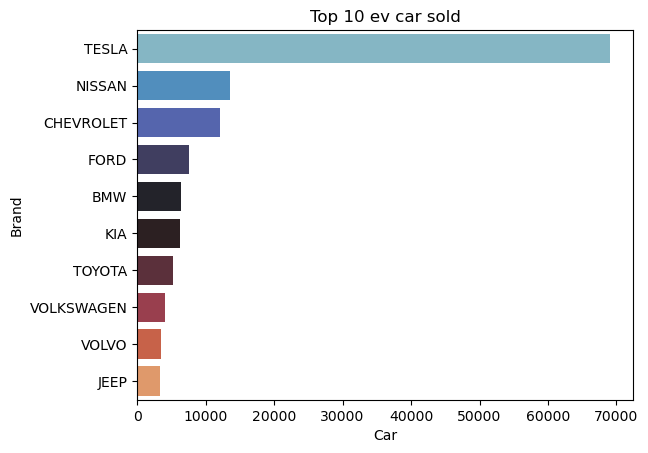

In [16]:
sns.barplot(data=top_10_car, x='make', y='index', palette='icefire')

plt.title("Top 10 ev car sold")
plt.xlabel("Car")
plt.ylabel("Brand")

plt.show()

tesla กินส่วนแบ่งในตลาดมากที่สุด โดยคิดเป็น 52.71 % รองลงมาเป็น nissan 10.31 % ต่างกันประมาณ 42.5 %

# tesla ขายมากสุดแล้วที่ขายได้ โมเดลไหน ปีอะไร

In [17]:
model_tesla = df.query("make == 'TESLA'").groupby(['model','model_year'])[['model','model_year']].\
    value_counts().sort_values(ascending=False).reset_index().head(10)
model_tesla = model_tesla.rename(columns={0: 'count'})

model_tesla

,model,model_year,count
0,MODEL Y,2023,12057
1,MODEL Y,2022,7506
2,MODEL Y,2021,6661
3,MODEL 3,2018,6247
4,MODEL 3,2022,4948
5,MODEL 3,2023,4839
6,MODEL 3,2019,4038
7,MODEL 3,2021,3819
8,MODEL 3,2020,3750
9,MODEL Y,2020,2278


In [18]:
model_y_vs_3 = df.query("make == 'TESLA'")['model'].value_counts().reset_index()
model_y_vs_3

,index,model
0,MODEL Y,28502
1,MODEL 3,27709
2,MODEL S,7611
3,MODEL X,5114
4,ROADSTER,47


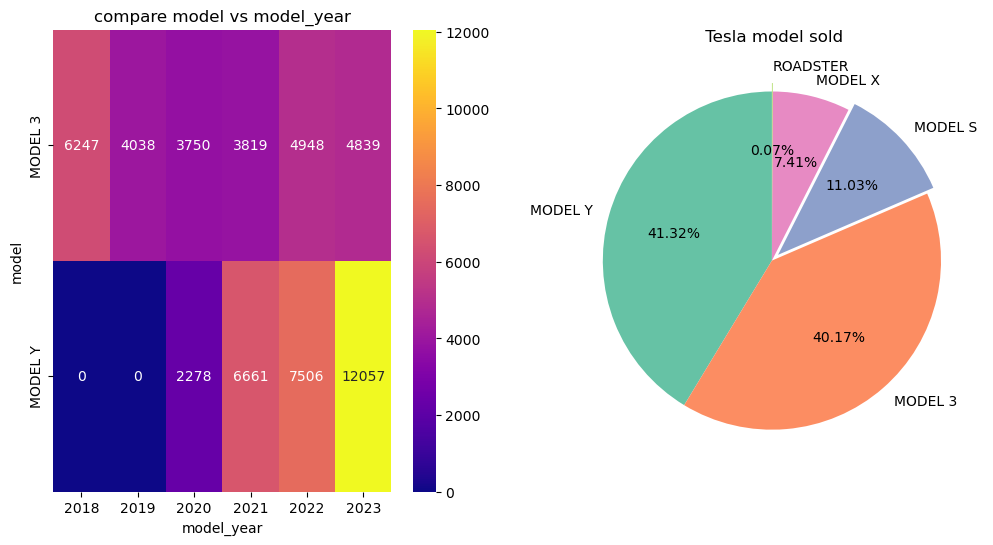

In [19]:
heatmap_data = model_tesla.pivot_table(index='model', columns='model_year', values='count', fill_value=0)

# แสดง Heatmap
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='plasma', ax = axes[0])
axes[0].set_title('compare model vs model_year')

plt.pie(model_y_vs_3['model'], 
        labels = model_y_vs_3['index'], 
        autopct="%1.2f%%" ,startangle= 90 , 
        colors= sns.color_palette('Set2'), 
        explode=[0, 0, 0.05, 0, 0.05])
axes[1].set_title(' Tesla model sold')

plt.show()


MODEL Y มีสัดส่วนที่ขายมากที่สุด รองลงมา เป็น MODEL 3 โดยที่ MODEL Y ปี 2023 จะมีจำนวนรถที่ถูกขาย มากที่สุดทิ้งห่างจาก รุ่นหรือรถปี อื่นๆ ถึง 2 เท่า

# check ประเภท ของ ev ระหว่าง hybrid กับ pure ev

In [20]:
df.head(2)

,vin_(1-10),county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_(cafv)_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,2020_census_tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


In [21]:
ev_type = df.electric_vehicle_type.value_counts().reset_index()
ev_type


,index,electric_vehicle_type
0,Battery Electric Vehicle (BEV),116807
1,Plug-in Hybrid Electric Vehicle (PHEV),33675


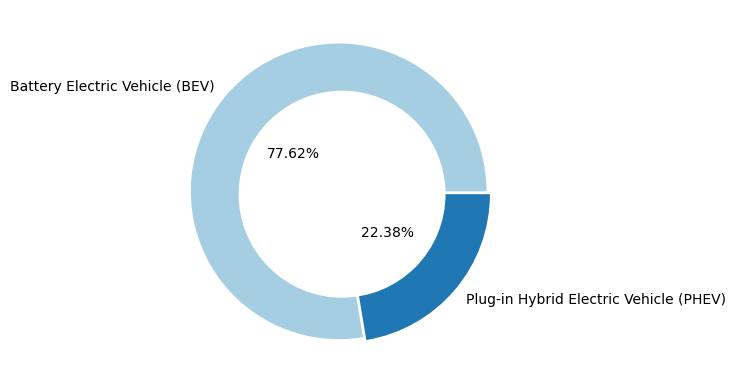

In [22]:
plt.pie(ev_type['electric_vehicle_type'] , 
        labels = ev_type['index'], 
        autopct= '%1.2f%%',
        pctdistance=0.4,
        colors = sns.color_palette('Paired'),
        explode = [0.03,0]
        )
### Add a hole in the pie  
# Hole - a white-colored circle of radius 0.65
hole = plt.Circle((0, 0), 0.7, facecolor='white')
 
# Current Figure ( plt.gcf() ) 
# --> Current Axis ( gca() ) 
# --> add the hole 
plt.gcf().gca().add_artist(hole)
 
plt.show()

# ถ้าเอา tesla ออก ลองหา สัดส่วนของตลาด

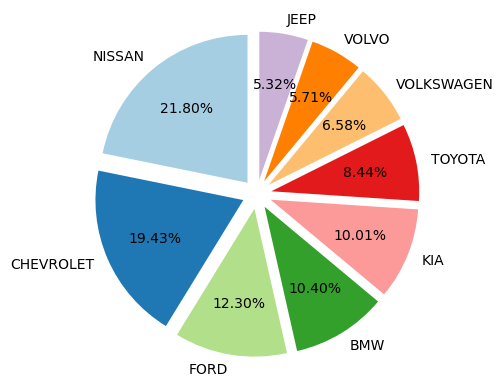

In [23]:
make_without_tesla = top_10_car.query('index != "TESLA"')
plt.pie(make_without_tesla['make'], 
        labels = make_without_tesla['index'], 
        autopct="%1.2f%%" ,
        startangle= 90 , 
        colors= sns.color_palette('Paired'),
        explode=[0.1, 0.1, 0.1, 0.1, 0.1,0.1 ,0.1,0.1,0.1],
        pctdistance= 0.65
        )

plt.show()
        

# model ของ รถยี่ห้ออื่นๆ ที่ขายได้ในปี 2023 ขึ้นไป

In [24]:
a = df.query("model_year >= 2023")\
    .groupby('electric_vehicle_type')['electric_vehicle_type','make']\
    .value_counts()\
    .reset_index()\
    .rename(columns = {0:"count"})\
    .sort_values('count',ascending = False)\
    .head(16)
remove_test = a.query("make != 'TESLA'")
remove_test

C:\Users\jj_18\AppData\Local\Temp\ipykernel_30828\1200858907.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a = df.query("model_year >= 2023")\


,electric_vehicle_type,make,count
1,Battery Electric Vehicle (BEV),CHEVROLET,1932
22,Plug-in Hybrid Electric Vehicle (PHEV),JEEP,1902
2,Battery Electric Vehicle (BEV),HYUNDAI,1755
3,Battery Electric Vehicle (BEV),VOLKSWAGEN,1312
4,Battery Electric Vehicle (BEV),FORD,1266
5,Battery Electric Vehicle (BEV),RIVIAN,1214
6,Battery Electric Vehicle (BEV),KIA,1053
7,Battery Electric Vehicle (BEV),BMW,972
8,Battery Electric Vehicle (BEV),NISSAN,926
23,Plug-in Hybrid Electric Vehicle (PHEV),KIA,869


In [25]:
remove_test['count'][2]/remove_test['count'].sum()*100

10.687534254917484

In [26]:
b = df.query("model_year >= 2023 & make != 'TESLA' & electric_vehicle_type == 'Plug-in Hybrid Electric Vehicle (PHEV)'" )\
    .groupby('electric_vehicle_type')['electric_vehicle_type','make']\
    .value_counts()\
    .reset_index()\
    .rename(columns = {0:"count"})\
    .sort_values('count', ascending = False)
b

C:\Users\jj_18\AppData\Local\Temp\ipykernel_30828\1999498389.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  b = df.query("model_year >= 2023 & make != 'TESLA' & electric_vehicle_type == 'Plug-in Hybrid Electric Vehicle (PHEV)'" )\


,electric_vehicle_type,make,count
0,Plug-in Hybrid Electric Vehicle (PHEV),JEEP,1902
1,Plug-in Hybrid Electric Vehicle (PHEV),KIA,869
2,Plug-in Hybrid Electric Vehicle (PHEV),BMW,834
3,Plug-in Hybrid Electric Vehicle (PHEV),CHRYSLER,710
4,Plug-in Hybrid Electric Vehicle (PHEV),VOLVO,516
5,Plug-in Hybrid Electric Vehicle (PHEV),TOYOTA,384
6,Plug-in Hybrid Electric Vehicle (PHEV),MITSUBISHI,254
7,Plug-in Hybrid Electric Vehicle (PHEV),HYUNDAI,146
9,Plug-in Hybrid Electric Vehicle (PHEV),MAZDA,136
8,Plug-in Hybrid Electric Vehicle (PHEV),AUDI,136


In [27]:
b['count'][0]/b['count'].sum()*100

31.231527093596057

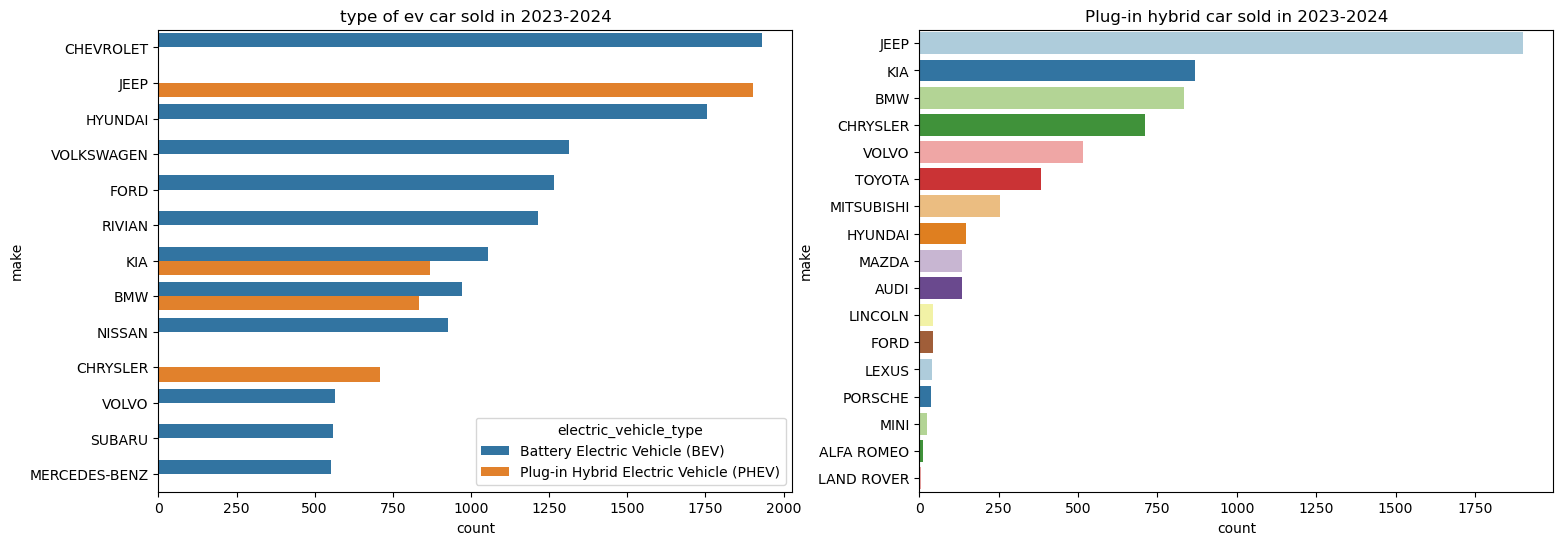

In [28]:
# แสดง Heatmap
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

sns.barplot(data = remove_test, x = 'count', y = 'make' , hue = 'electric_vehicle_type',ax = axes[0]) 
axes[0].set_title("type of ev car sold in 2023-2024")

sns.barplot(data = b , x = 'count' , y = 'make' ,palette= 'Paired', ax = axes[1])
axes[1].set_title("Plug-in hybrid car sold in 2023-2024") 
plt.show()

สัดส่วนหลัก ในตลาดรองจาก tesla ในรุ่นปี 2023 ขึ้นไปเป็น BEV CHEVROLET ถึง 9.78%  ลองลงมาเป็น JEEP ที่เป็น plug-in hybird 9.63%

เมื่อเทียบในตลาด plug-in hybrid jeep ยังคงครองตลาด ในรถปีใหม่ๆ 2023+ มากถึง 31.32 %

สิ่งที่น่าสนใจคือ KIA และ BMW ผู้คนยังสนใจ ประเภททั้ง 2 แบบพอๆกัน

# การเติบโต ของ tesla ในอนาคต

In [110]:
trend_buy_tesla = df.query("make == 'TESLA'")['model_year']\
    .value_counts()\
    .sort_index(ascending=False)\
    .reset_index()\
    .head(6)
trend_buy_tesla = trend_buy_tesla.rename(columns= {"model_year" : "count","index" : "year"})
trend_buy_tesla['percent']  = round(trend_buy_tesla['count'] / trend_buy_tesla['count'].sum() * 100,2)
trend_buy_tesla

,year,count,percent
0,2023,17968,28.53
1,2022,13985,22.21
2,2021,11132,17.68
3,2020,7107,11.29
4,2019,4725,7.50
5,2018,8058,12.80


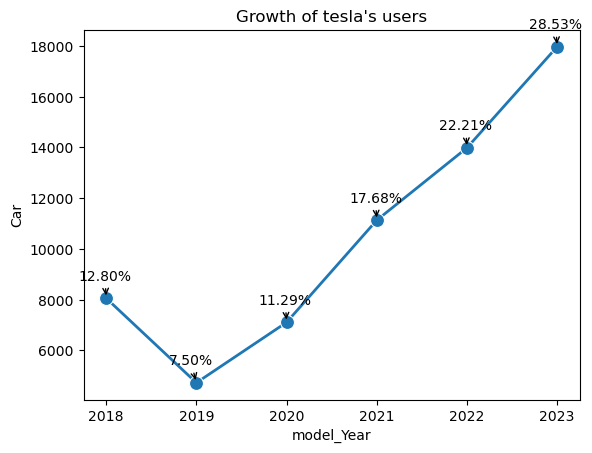

In [128]:
sns.lineplot(data = trend_buy_tesla, x = 'year' , y = 'count' , linewidth=2, marker="o", markersize = 10)
plt.xlabel("model_Year")
plt.ylabel("Car")
plt.title("Growth of tesla's users")

# จุดตัด x,y แสดงเป็น percent
for i, txt in enumerate(trend_buy_tesla['percent']):
    plt.annotate(f'{txt:.2f}%', (trend_buy_tesla['year'][i], trend_buy_tesla['count'][i]),xytext=(-20, 13), textcoords='offset points', arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()

- เมื่อเทียบกับระหว่าง รถปี 2018 กับ ปี 2023 จะพบว่า จำนวนรถที่ถูกขายมีการเติบโตถึง 223 % เทียบกับรถปี 2018
- 2019-2023 มีแนวโน้มเฉลี่ยเติบโตปีละ 39.64 % (เทียบจาก ปริมาณปีรถเฉลี่ยแต่ละปี)

# อยากทดสอบว่า bev , plug in ค่าเฉลี่ยต่างกันอย่างมีนัยยะสำคัญไหม เมื่อเทียบกับ electric range
## test การกระจายตัวก่อน
- H0 = การกระจายตัว แจกแจงปกติ
- H1 = การกระจายตัว แจกแจงไม่ปกติ

In [31]:
hypo_ev_range = df.query('electric_vehicle_type == "Battery Electric Vehicle (BEV)"')['electric_range']
hypo_plug_range = df.query('electric_vehicle_type == "Plug-in Hybrid Electric Vehicle (PHEV)"')['electric_range']

In [32]:
# Set the alpha level
#alpha=0.05

# We pass groups to the criterion for testing
# Shapiro-Wilk Test
hypo_bev_random = hypo_ev_range.sample(n = 5000, random_state= 42)
hypo_plug_random = hypo_plug_range.sample(n = 5000, random_state= 42)

stat_bev, p_value_bev = shapiro(hypo_bev_random.sample(n = 5000, random_state= 42))
stat_plugin, p_value_plugin = shapiro(hypo_plug_random.sample(n = 5000 , random_state= 42))

print(f'Shapiro-Wilk Test for bev    : Statistic={stat_bev}  , p-value = {p_value_bev:1.20f}')
print(f'Shapiro-Wilk Test for plugin : Statistic={stat_plugin}  , p-value = {p_value_plugin:1.20f}')
if p_value_bev > 0.05 and p_value_plugin > 0.05:
    print("ข้อมูลมีการกระจายตัวปกติ")
else:
    print("ข้อมูลมีการกระจายตัวไม่ปกติ")

Shapiro-Wilk Test for bev    : Statistic=0.7250781059265137  , p-value = 0.00000000000000000000
Shapiro-Wilk Test for plugin : Statistic=0.8316183090209961  , p-value = 0.00000000000000000000
ข้อมูลมีการกระจายตัวไม่ปกติ


In [33]:
# ทดสอบความแปรปรวน
#ทดสอบ Levene's test สำหรับ BEV และ plug
stat_var, p_value_var = levene(hypo_ev_range, hypo_plug_range)

# ตรวจสอบค่า p-value
if p_value_var > 0.05:
    print("ความแปรปรวนเท่ากัน")
else:
    print("ความแปรปรวนไม่เท่ากัน")

ความแปรปรวนไม่เท่ากัน


- ไม่สามารถใช้ t-test ปกติในการทดสอบได้ ต้องเปลี่ยนไปใช้ Mann-Whitney U test

In [34]:
# ทดสอบสมมุติฐาน
stat, p_value = mannwhitneyu(hypo_bev_random, hypo_plug_random)

# ตรวจสอบค่า p-value
print(f"p_value = {p_value:1.20f}")
if p_value < 0.05:
    print("มีนัยยะสำคัญทางสถิติ")
else:
    print("ไม่มีนัยยะสำคัญทางสถิติ")

p_value = 0.00000000000000000000
มีนัยยะสำคัญทางสถิติ


In [35]:
print(f'''
      hypo_bev_random_mean : {hypo_bev_random.mean():1.3f} miles
      hypo_plug_random     : {hypo_plug_random.mean():1.3f} miles''')


      hypo_bev_random_mean : 78.976 miles
      hypo_plug_random     : 30.868 miles


### สรุปได้ว่า
- electric range ระหว่าง bev , plugin ไม่เท่ากัน
- รถ แบบ bev มี electric range ไกลกว่า plugin ถึงประมาณ 48 miles (bev ดูดีกว่าเยอะ)


# อัตราการเติบโต ของ ตลาดรถ EV

In [123]:
trend_buy_ev = df.model_year.value_counts().sort_values('index',ascending=True).tail(10).reset_index()
   
trend_buy_ev = trend_buy_ev.rename(columns= {"model_year" : "count","index" : "year"})
trend_buy_ev['percent']  = round(trend_buy_ev['count'] / trend_buy_ev['count'].sum() * 100,2)
trend_buy_ev

C:\Users\jj_18\AppData\Local\Temp\ipykernel_30828\326858726.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  trend_buy_ev = df.model_year.value_counts().sort_values('index',ascending=True).tail(10).reset_index()


,year,count,percent
0,2013,4566,3.18
1,2015,4934,3.43
2,2016,5650,3.93
3,2017,8574,5.97
4,2019,10717,7.46
5,2020,11294,7.86
6,2018,14441,10.05
7,2021,18684,13.00
8,2022,27799,19.34
9,2023,37079,25.80


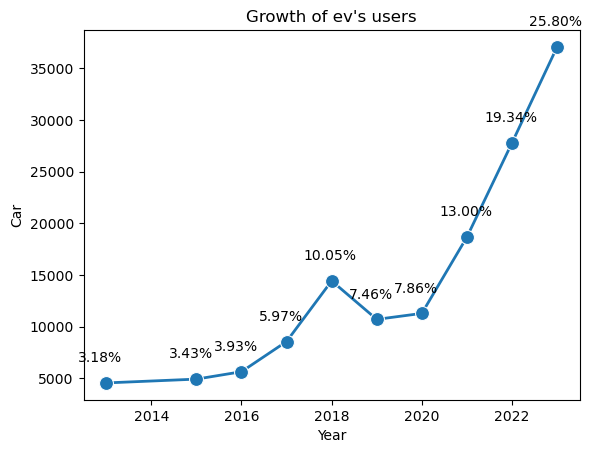

In [125]:
sns.lineplot(data = trend_buy_ev, x = 'year' , y = 'count' , linewidth=2, marker="o", markersize = 10)
plt.xlabel("Year")
plt.ylabel("Car")
plt.title("Growth of ev's users")

##for index, row in trend_buy_tesla.iterrows():
##   plt.text(row['year'], row['count'], str(row['count']), fontsize=10, ha='left', va='center')

# จุดตัด x,y แสดงเป็น percent
for i, txt in enumerate(trend_buy_ev['percent']):
    plt.annotate(f'{txt:.2f}%', (trend_buy_ev['year'][i], trend_buy_ev['count'][i]),xytext=(-20, 15), textcoords='offset points')
plt.show()